# **Consignas**

**1) Describir cómo se representa la solución al problema utilizando algoritmos genéticos.**

>La solución al problema será representada por un equipo de fútbol de 11 integrantes, el cual se espera que alcance o supere un promedio dado por cada característica. 


**2) Definir la estructura de los cromosomas para representar el problema. Justificar.**

>Los cromosomas estan compuestos por 11 genes que representan un equipo de jugadores. Cada gen puede tomar valores enteros del 0 al 30 (el cual indica el número del jugador), ya que el director técnico cuenta con un listado de 31 jugadores para elegir. 

>Nos pareció conveniente representar la solución de esta manera porque debemos conformar un equipo que supere un promedio dado por cada caracteristica. De esta manera iremos variando los jugadores entre los equipos hasta obtener el equipo buscado.



**3) Definir cómo se seleccionarán padres para generar hijos para la siguiente generación.**

>Los padres son seleccionados mediante el método de elitismo con un valor de 20%, el cual copia los 10 cromosomas con mayor valor de fitness a la nueva población. El resto de los cromosomas se determinan mediante el método de la ruleta. 




**4) Determinar qué operaciones (crossover, mutación) se utilizarán.**

>El método de crossover utilizado es el uniform, que opera a nivel de gen. A dicho método le agregamos una restricción para que no se intercambien genes si el valor de un gen ya se encuentra en el cromosoma en el cual se va a agregar, quedando asi los genes en sus cromosomas originarios. Esto nos asegura no generar equipos con jugadores repetidos.

>El método de mutación opera a nivel de gen con una probabilidad de 20%. Cuando se aplica la mutación se chequea que el jugador elegido aleatoriamente no se encuentre dentro del equipo, si es asi, se itera hasta encontrar un jugador válido. Esto nos asegura no generar equipos con jugadores repetidos.



**5) Definir la función de fitness que se usará según lo indicado.**

>La función de fitness en principio chequea si el equipo a evaluar no contiene algún jugador repetido, ya que este sería un equipo no válido para la solución. En caso de que asi sea, se le asigna un valor de fitness negativo para que descarte esa opción.

>En caso de que el equipo a evaluar sea válido, se calcula el promedio de cada caracteristica de los jugadores. El valor de fitness toma la suma de los promedios, y en caso de que algunos de los promedios supere el promedio esperado, lo que se suma al valor de fitness es el propio promedio esperado. Esto lo hacemos para no darle más valor de fitness a las características que superan el promedio esperado.



**6) Definir cómo se eliminarán elementos de una generación para pasar a la siguiente.**

>El método elegido para la eliminación de elementos es Steady-State-No_Duplicates. Este método elimina una determinada cantidad de miembros antiguos y los reemplaza por nuevos miembros, pero además se asegura de no incluir cromosomas duplicados en la población.



**7) Determinar cuál será el criterio de terminación de la ejecución del algoritmo.**

> El algoritmo finaliza cuando se alcanza un número de 200 iteraciones sin obtener mejoras en la función objetivo. Después de realizar pruebas con valores mayores, pudimos observar que a partir del valor 200 la función objetivo no mejora, por lo que elegimos dicho valor.

#Instalación de la librería

In [ ]:
!pip install geneticalgorithm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Listado de jugadores disponibles
jugadores = (("J0", 10, 4, 6, 10, 10), 
             ("J1", 9, 6, 8, 10, 7),   
             ("J2", 8, 7, 3, 6, 5),
             ("J3", 5, 4, 6, 7, 6),
             ("J4", 4, 8, 5, 8, 3),
             ("J5", 3, 10, 4, 9, 4),    
             ("J6", 2, 10, 9, 9, 6),    
             ("J7", 10, 4, 10, 9, 8),   
             ("J8", 4, 3, 10, 7, 2),
             ("J9", 9, 7, 4, 4, 1),
             ("J10", 1, 9, 5, 3, 5),
             ("J11", 2, 9, 4, 9, 7),    
             ("J12", 10, 9, 8, 5, 5),   
             ("J13", 6, 6, 9, 9, 8),    
             ("J14", 2, 6, 5, 6, 3),
             ("J15", 8, 8, 3, 5, 7),    
             ("J16", 2, 4, 1, 10, 9),   
             ("J17", 10, 4, 2, 9, 5),
             ("J18", 7, 9, 4, 3, 9),    
             ("J19", 6, 8, 7, 8, 6),    
             ("J20", 1, 6, 8, 8, 5),
             ("J21", 2, 9, 5, 8, 7),    
             ("J22", 10, 9, 10, 2, 5),   
             ("J23", 6, 9, 9, 6, 8),    
             ("J24", 6, 2, 5, 6, 3),
             ("J25", 8, 10, 3, 5, 5),    
             ("J26", 2, 4, 9, 10, 1),   
             ("J27", 10, 5, 3, 8, 5),
             ("J28", 7, 8, 4, 6, 10),    
             ("J29", 10, 8, 7, 7, 6),    
             ("J30", 10, 1, 5, 8, 5))

Promedio de caracteristicas esperadas por el director técnico 

In [ ]:
promedios_esperados = [7.5 , 7.5 , 8.0 , 7.0 , 9.0] 

Realizamos modificaiones en los siguientes métodos de la clase geneticalgorithm:

>run: Se agregaron sentencias para controlar que en la población inicial no se generen equipos con jugadores repetidos.

>cross: Se agregaron sentencias para controlar que no se generen equipos con jugadores repetidos al momento ejecutar el crossover uniform-modificado.

>mut: Se agregaron sentencias para controlar que no se generen equipos con jugadores repetidos al aplicarle una mutación.

>mutmidle: Se repite algoritmo del método mut.

Además agregamos el método mostrar, el cual imprime por pantalla una tabla con el número de jugador y las características de los jugadores que integran el equipo encontrado como solución. Como últimas dos filas se muestra el promedio de las caracteristicas del equipo y el promedio esperado por el entrenador.

In [ ]:
###############################################################################
###############################################################################
###############################################################################

import numpy as np
import sys
import time
from func_timeout import func_timeout, FunctionTimedOut
import matplotlib.pyplot as plt

###############################################################################
###############################################################################
###############################################################################

class geneticalgorithm():
    
    #############################################################
    def __init__(self, function, dimension, variable_type='bool', \
                 variable_boundaries=None,\
                 variable_type_mixed=None, \
                 function_timeout=10,\
                 algorithm_parameters={'max_num_iteration': None,\
                                       'population_size':100,\
                                       'mutation_probability':0.1,\
                                       'elit_ratio': 0.01,\
                                       'crossover_probability': 0.5,\
                                       'parents_portion': 0.3,\
                                       'crossover_type':'uniform-modificado',\
                                       'max_iteration_without_improv':None},\
                     convergence_curve=True,\
                         progress_bar=True):



        self.__name__=geneticalgorithm
        #############################################################
        # input function
        assert (callable(function)),"function must be callable"     
        
        self.f=function
        #############################################################
        #dimension
        
        self.dim=int(dimension)
        
        #############################################################
        # input variable type
        
        assert(variable_type=='bool' or variable_type=='int' or\
               variable_type=='real'), \
               "\n variable_type must be 'bool', 'int', or 'real'"
       #############################################################
        # input variables' type (MIXED)     

        if variable_type_mixed is None:
            
            if variable_type=='real': 
                self.var_type=np.array([['real']]*self.dim)
            else:
                self.var_type=np.array([['int']]*self.dim)            

 
        else:
            assert (type(variable_type_mixed).__module__=='numpy'),\
            "\n variable_type must be numpy array"  
            assert (len(variable_type_mixed) == self.dim), \
            "\n variable_type must have a length equal dimension."       

            for i in variable_type_mixed:
                assert (i=='real' or i=='int'),\
                "\n variable_type_mixed is either 'int' or 'real' "+\
                "ex:['int','real','real']"+\
                "\n for 'boolean' use 'int' and specify boundary as [0,1]"
                

            self.var_type=variable_type_mixed
        #############################################################
        # input variables' boundaries 

            
        if variable_type!='bool' or type(variable_type_mixed).__module__=='numpy':
                       
            assert (type(variable_boundaries).__module__=='numpy'),\
            "\n variable_boundaries must be numpy array"
        
            assert (len(variable_boundaries)==self.dim),\
            "\n variable_boundaries must have a length equal dimension"        
        
        
            for i in variable_boundaries:
                assert (len(i) == 2), \
                "\n boundary for each variable must be a tuple of length two." 
                assert(i[0]<=i[1]),\
                "\n lower_boundaries must be smaller than upper_boundaries [lower,upper]"
            self.var_bound=variable_boundaries
        else:
            self.var_bound=np.array([[0,1]]*self.dim)
 
        ############################################################# 
        #Timeout
        self.funtimeout=float(function_timeout)
        ############################################################# 
        #convergence_curve
        if convergence_curve==True:
            self.convergence_curve=True
        else:
            self.convergence_curve=False
        ############################################################# 
        #progress_bar
        if progress_bar==True:
            self.progress_bar=True
        else:
            self.progress_bar=False
        ############################################################# 
        ############################################################# 
        # input algorithm's parameters
        
        self.param=algorithm_parameters
        
        self.pop_s=int(self.param['population_size'])
        
        assert (self.param['parents_portion']<=1\
                and self.param['parents_portion']>=0),\
        "parents_portion must be in range [0,1]" 
        
        self.par_s=int(self.param['parents_portion']*self.pop_s)
        trl=self.pop_s-self.par_s
        if trl % 2 != 0:
            self.par_s+=1
               
        self.prob_mut=self.param['mutation_probability']
        
        assert (self.prob_mut<=1 and self.prob_mut>=0), \
        "mutation_probability must be in range [0,1]"
        
        
        self.prob_cross=self.param['crossover_probability']
        assert (self.prob_cross<=1 and self.prob_cross>=0), \
        "mutation_probability must be in range [0,1]"
        
        assert (self.param['elit_ratio']<=1 and self.param['elit_ratio']>=0),\
        "elit_ratio must be in range [0,1]"                
        
        trl=self.pop_s*self.param['elit_ratio']
        if trl<1 and self.param['elit_ratio']>0:
            self.num_elit=1
        else:
            self.num_elit=int(trl)
            
        assert(self.par_s>=self.num_elit), \
        "\n number of parents must be greater than number of elits"
        
        if self.param['max_num_iteration']==None:
            self.iterate=0
            for i in range (0,self.dim):
                if self.var_type[i]=='int':
                    self.iterate+=(self.var_bound[i][1]-self.var_bound[i][0])*self.dim*(100/self.pop_s)
                else:
                    self.iterate+=(self.var_bound[i][1]-self.var_bound[i][0])*50*(100/self.pop_s)
            self.iterate=int(self.iterate)
            if (self.iterate*self.pop_s)>10000000:
                self.iterate=10000000/self.pop_s
        else:
            self.iterate=int(self.param['max_num_iteration'])
        
        self.c_type=self.param['crossover_type']
        assert (self.c_type=='uniform-modificado' or self.c_type=='one_point' or\
                self.c_type=='two_point'),\
        "\n crossover_type must 'uniform-modificado', 'one_point', or 'two_point' Enter string" 
        
        
        self.stop_mniwi=False
        if self.param['max_iteration_without_improv']==None:
            self.mniwi=self.iterate+1
        else: 
            self.mniwi=int(self.param['max_iteration_without_improv'])

        
        ############################################################# 

    def run(self):   #Modificado
        
        
        ############################################################# 
        # Initial Population
        
        self.integers=np.where(self.var_type=='int')
        self.reals=np.where(self.var_type=='real')
        
        
        pop=np.array([np.zeros(self.dim+1)]*self.pop_s)
        solo=np.zeros(self.dim+1)
        var=np.zeros(self.dim)       
      
        for p in range(0,self.pop_s):
          
          for i in self.integers[0]:
              noAsignado=True
              arrayAux=[]
              while(noAsignado):
                aux=np.random.randint(self.var_bound[i][0],\
                        self.var_bound[i][1]+1) 
                arrayAux=var.copy()
                if aux not in arrayAux:
                  var[i]=aux
                  noAsignado=False

              solo[i]=var[i].copy()
        
          

          obj=self.sim(var)            
          solo[self.dim]=obj
          pop[p]=solo.copy()

        #############################################################
        #############################################################
        # Report
        self.report=[]
        self.test_obj=obj
        self.best_variable=var.copy()
        self.best_function=obj
        ##############################################################   
                        
        t=1
        counter=0
        while t<=self.iterate:
            
            if self.progress_bar==True:
                self.progress(t,self.iterate,status="GA is running...")
            #############################################################
            #Sort
            pop = pop[pop[:,self.dim].argsort()]

                
            
            if pop[0,self.dim]<self.best_function:
                counter=0
                self.best_function=pop[0,self.dim].copy()
                self.best_variable=pop[0,: self.dim].copy()
            else:
                counter+=1
            #############################################################
            # Report

            self.report.append(pop[0,self.dim])
    
            ##############################################################         
            # Normalizing objective function 
            
            normobj=np.zeros(self.pop_s)
            
            minobj=pop[0,self.dim]
            if minobj<0:
                normobj=pop[:,self.dim]+abs(minobj)
                
            else:
                normobj=pop[:,self.dim].copy()
    
            maxnorm=np.amax(normobj)
            normobj=maxnorm-normobj+1

            #############################################################        
            # Calculate probability
            
            sum_normobj=np.sum(normobj)
            prob=np.zeros(self.pop_s)
            prob=normobj/sum_normobj
            cumprob=np.cumsum(prob)
  
            #############################################################        
            # Select parents
            par=np.array([np.zeros(self.dim+1)]*self.par_s)
            
            for k in range(0,self.num_elit):
                par[k]=pop[k].copy()
            for k in range(self.num_elit,self.par_s):
                index=np.searchsorted(cumprob,np.random.random())
                par[k]=pop[index].copy()
                
            ef_par_list=np.array([False]*self.par_s)
            par_count=0
            while par_count==0:
                for k in range(0,self.par_s):
                    if np.random.random()<=self.prob_cross:
                        ef_par_list[k]=True
                        par_count+=1
                 
            ef_par=par[ef_par_list].copy()
    
            #############################################################  
            #New generation
            pop=np.array([np.zeros(self.dim+1)]*self.pop_s)
            
            for k in range(0,self.par_s):
                pop[k]=par[k].copy()
                
            for k in range(self.par_s, self.pop_s, 2):
                r1=np.random.randint(0,par_count)
                r2=np.random.randint(0,par_count)
                pvar1=ef_par[r1,: self.dim].copy()
                pvar2=ef_par[r2,: self.dim].copy()
                
                ch=self.cross(pvar1,pvar2,self.c_type)
                ch1=ch[0].copy()
                ch2=ch[1].copy()
                
                ch1=self.mut(ch1)
                ch2=self.mutmidle(ch2,pvar1,pvar2)               
                solo[: self.dim]=ch1.copy()                
                obj=self.sim(ch1)
                solo[self.dim]=obj
                pop[k]=solo.copy()                
                solo[: self.dim]=ch2.copy()                
                obj=self.sim(ch2)               
                solo[self.dim]=obj
                pop[k+1]=solo.copy()
        #############################################################       
            t+=1
            if counter > self.mniwi:
                pop = pop[pop[:,self.dim].argsort()]
                if pop[0,self.dim]>=self.best_function:
                    t=self.iterate
                    if self.progress_bar==True:
                        self.progress(t,self.iterate,status="GA is running...")
                    time.sleep(2)
                    t+=1
                    self.stop_mniwi=True
                
        #############################################################
        #Sort
        pop = pop[pop[:,self.dim].argsort()]
        
        if pop[0,self.dim]<self.best_function:
                
            self.best_function=pop[0,self.dim].copy()
            self.best_variable=pop[0,: self.dim].copy()
        #############################################################
        # Report

        self.report.append(pop[0,self.dim])

 
        # Modificado
        self.output_dict={'variable': self.best_variable, 'function':\
                          self.best_function}
        if self.progress_bar==True:
            show=' '*100
            sys.stdout.write('\r%s' % (show))
        sys.stdout.write('\r The best solution found:\n %s' % (self.best_variable))
        print("\n")
        self.mostrar(self.best_variable)  # Sentencia agregada

        sys.stdout.write('\n\n Objective function:\n %s\n' % (self.best_function))
        print("\n")
        sys.stdout.flush() 
        re=np.array(self.report)
        if self.convergence_curve==True:
            plt.plot(re)
            plt.xlabel('Iteration')
            plt.ylabel('Objective function')
            plt.title('Genetic Algorithm')
            plt.show()
        


##############################################################################         
##############################################################################         
    def cross(self,x,y,c_type):
         
        ofs1=x.copy()
        ofs2=y.copy()
     
        if c_type=='one_point':
            ran=np.random.randint(0,self.dim)
            for i in range(0,ran):
                ofs1[i]=y[i].copy()                     
                ofs2[i]=x[i].copy()                     
  
        if c_type=='two_point':
                
            ran1=np.random.randint(0,self.dim)
            ran2=np.random.randint(ran1,self.dim)
                
            for i in range(ran1,ran2):
                ofs1[i]=y[i].copy()
                ofs2[i]=x[i].copy()
                   
        if c_type=='uniform-modificado':      #Implementado por nosotros
            arrayAux1=[]
            arrayAux2=[]
            for i in range(0, self.dim):
              arrayAux1=ofs1
              arrayAux2=ofs2
              dato1 = y[i]
              dato2 = x[i]
              ran=np.random.random()                 
              if (ran <0.5) and (dato1 not in arrayAux1) and (dato2 not in arrayAux2):
                ofs1[i]=y[i].copy()
                ofs2[i]=x[i].copy() 
    
        return np.array([ofs1,ofs2])
###############################################################################  

    def mut(self,x): 
        for i in self.integers[0]:        #modificado mutacion para el int
            ran=np.random.random()
            if ran < self.prob_mut:
                noAsignado = True
                while (noAsignado): 
                  aux=np.float64(np.random.randint(self.var_bound[i][0],\
                  self.var_bound[i][1]+1)) 
                  if(aux not in x):
                    x[i]=aux
                    noAsignado=False   
        return x
###############################################################################
    def mutmidle(self, x, p1, p2):   #modificado para que ejecute el mismo algoritmo de mut

        for i in self.integers[0]:        #modificado mutacion para el int
            ran=np.random.random()
            if ran < self.prob_mut:
                noAsignado = True
                while (noAsignado): 
                  aux=np.float64(np.random.randint(self.var_bound[i][0],\
                  self.var_bound[i][1]+1)) 
                  if(aux not in x):
                    x[i]=aux
                    noAsignado=False

        return x
###############################################################################     
    def evaluate(self):
        return self.f(self.temp)
###############################################################################    
    def sim(self,X):
        self.temp=X.copy()
        obj=None
        try:
            obj=func_timeout(self.funtimeout,self.evaluate)
        except FunctionTimedOut:
            print("given function is not applicable")
        assert (obj!=None), "After "+str(self.funtimeout)+" seconds delay "+\
                "func_timeout: the given function does not provide any output"
        return obj

###############################################################################
    def progress(self, count, total, status=''):
        bar_len = 50
        filled_len = int(round(bar_len * count / float(total)))

        percents = round(100.0 * count / float(total), 1)
        bar = '|' * filled_len + '_' * (bar_len - filled_len)

        sys.stdout.write('\r%s %s%s %s' % (bar, percents, '%', status))
        sys.stdout.flush()     
###############################################################################            
###############################################################################

    def mostrar(self,X):    # Metodo agregado para imprimir la tabla de jugadores
      cromosoma=X
      print("+---------------+-----------+-----------+-----------+-----------+-----------+")
      print("|               | Ofensivo  | Defensivo |   Aereo   | Habilidad | Velocidad |")
      print("+---------------+-----------+-----------+-----------+-----------+-----------+")
      for g in range(0,11):
         print("| Jugador " + (str(int(cromosoma[g])) +" ")[0:2] + "    ", end="|")
         print("    " + (" "+str(int(jugadores[int(cromosoma[g])][1])))[-2:] + "     |    " + (" "+str(int(jugadores[int(cromosoma[g])][2])))[-2:] + "     |    " + (" "+str(int(jugadores[int(cromosoma[g])][3])))[-2:] + "     |    " + (" "+str(int(jugadores[int(cromosoma[g])][4])))[-2:] + "     |    " + (" "+str(int(jugadores[int(cromosoma[g])][5])))[-2:] + "     |")
         print("+---------------+-----------+-----------+-----------+-----------+-----------+")

      sumas_de_caracteristicas = [0 , 0 , 0 , 0 , 0]
      for i in range(0,11):
        sumas_de_caracteristicas[0]+=jugadores[int(cromosoma[i])][1]  #Juego-Ofensivo 
        sumas_de_caracteristicas[1]+=jugadores[int(cromosoma[i])][2]  #Juego-Defensivo 
        sumas_de_caracteristicas[2]+=jugadores[int(cromosoma[i])][3]  #Juego-Aereo 
        sumas_de_caracteristicas[3]+=jugadores[int(cromosoma[i])][4]  #Habilidad 
        sumas_de_caracteristicas[4]+=jugadores[int(cromosoma[i])][5]  #Velocidad
      print("| Prom Obtenido ", end="|")
      for j in range(0,5):
        print( "    " + str(round(sumas_de_caracteristicas[j]/11,1)) + "    ", end="|")
      print("\n+---------------+-----------+-----------+-----------+-----------+-----------+")
      print("| Prom Esperado ", end="|")
      for j in range(0,5):
        print("    " + str(promedios_esperados[j]) + "    ", end="|")
      print("\n+---------------+-----------+-----------+-----------+-----------+-----------+")

            
            

Ejecución del algoritmo genético.

 The best solution found:
 [18.  0. 13. 23. 12.  1. 28. 19.  7.  6. 22.]

+---------------+-----------+-----------+-----------+-----------+-----------+
|               | Ofensivo  | Defensivo |   Aereo   | Habilidad | Velocidad |
+---------------+-----------+-----------+-----------+-----------+-----------+
| Jugador 18    |     7     |     9     |     4     |     3     |     9     |
+---------------+-----------+-----------+-----------+-----------+-----------+
| Jugador 0     |    10     |     4     |     6     |    10     |    10     |
+---------------+-----------+-----------+-----------+-----------+-----------+
| Jugador 13    |     6     |     6     |     9     |     9     |     8     |
+---------------+-----------+-----------+-----------+-----------+-----------+
| Jugador 23    |     6     |     9     |     9     |     6     |     8     |
+---------------+-----------+-----------+-----------+-----------+-----------+
| Jugador 12    |    10     |     9     |     8     |     5     |   

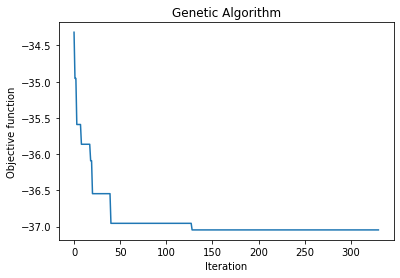

In [ ]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

# Función de fitness

def fitness(X):
    cromosoma=X
    valor_fitness=0.0
    if(esUnEquipoValido(cromosoma)):
      sumas_de_caracteristicas = [0 , 0 , 0 , 0 , 0]
      for i in range(0,11):
        sumas_de_caracteristicas[0]+=jugadores[int(cromosoma[i])][1]  #Juego-Ofensivo 
        sumas_de_caracteristicas[1]+=jugadores[int(cromosoma[i])][2]  #Juego-Defensivo 
        sumas_de_caracteristicas[2]+=jugadores[int(cromosoma[i])][3]  #Juego-Aereo 
        sumas_de_caracteristicas[3]+=jugadores[int(cromosoma[i])][4]  #Habilidad 
        sumas_de_caracteristicas[4]+=jugadores[int(cromosoma[i])][5]  #Velocidad
      for j in range(0,5):
        if( (sumas_de_caracteristicas[j]/11) >= promedios_esperados[j]):
          valor_fitness+= promedios_esperados[j]
          #valor_fitness-= ((sumas_de_caracteristicas[j]/11) - promedios_esperados[j])  #Agregando esta sentencia se busca igualar el valor exacto de los promedios esperados 
        else:
          valor_fitness += (sumas_de_caracteristicas[j]/11)
    else:
        valor_fitness=-1000000000
    return -valor_fitness # Objetivo: maximizar 


def esUnEquipoValido(cromosoma): 
    return len(cromosoma)==len(set(cromosoma)) #siempre da valido para nuestro algoritmo

# Rangos de cada gen
varbound=np.array([[0,30]]*11)

# Parametros del algoritmo
algorithm_param = {'max_num_iteration': None,\
                   'population_size':50,\
                   'mutation_probability':0.2,\
                   'elit_ratio': 0.2,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.4,\
                   'crossover_type':'uniform-modificado',\
                   'max_iteration_without_improv':200}

# Creación del modelo
model=geneticalgorithm( function=fitness, dimension=11, variable_type="int", variable_boundaries=varbound, algorithm_parameters=algorithm_param )

# Ejecucion del algoritmo
model.run()